In [1]:
#Importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv',sep=';')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#Preprocessing Data
bins = (2,6.5,8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [7]:
label_quality = LabelEncoder()

In [8]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [11]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [12]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

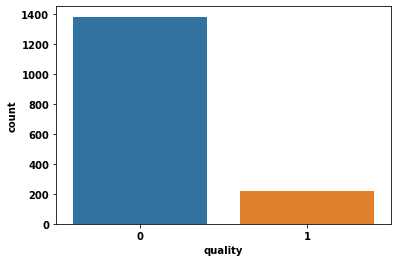

In [13]:
sns.countplot(wine['quality'])

In [15]:
#Now separate the dataset as response variable and feature variables
X = wine.drop('quality', axis=1)
y = wine['quality']

In [16]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train[:10]

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01,
        -3.86510130e-02,  5.18158057e-01, -1.81975648e-01,
        -1.99566462e-02,  1.75731759e-01, -4.65392578e-01,
        -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01,
        -6.65728970e-01, -1.30756387e-01,  4.97010797e-01,
         1.68066777e+00, -4.17191190e-01,  5.08915214e-01,
        -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01,
         1.00699644e-01,  3.76208022e-01,  1.09018543e-01,
        -3.84376165e-01,  1.95450060e+00, -2.05577167e-01,
         1.83329452e+00, -4.92358280e-01],
       [ 1.02293339e-01, -3.93733284e-01,  1.92092221e-01,
        -2.12839335e-01, -2.11870693e-01,  1.56398950e+00,
         3.44462872e-01,  6.60850535e-01,  1.19192097e-01,
        -6.87670232e-01, -5.87389780e-01],
       [-9.42051337e-01, -3.93733284e-01, -1.66199791e-01,
        -5.96053642e-01, -2.32149269e-01,  2.06016607e-01,
  

# Random Forest Classifier

In [21]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [22]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [24]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       273
           1       0.76      0.47      0.58        47

    accuracy                           0.90       320
   macro avg       0.84      0.72      0.76       320
weighted avg       0.89      0.90      0.89       320

[[266   7]
 [ 25  22]]


# SVM Classifier

In [27]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [31]:
#Let's see how our model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


# Neural Network

In [30]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

C:\Users\tanck\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [32]:
#Let's see how our model performed
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       273
           1       0.60      0.62      0.61        47

    accuracy                           0.88       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.89      0.88      0.88       320

[[254  19]
 [ 18  29]]


In [35]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.9

In [37]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [38]:
Xnew = [[7.3,0.58,0.00,2.0,0.65,15.0,21.0,0.9946,3.36,0.47,10.0]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([0])